# Square-root transformation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer

In [2]:
# create dataframe
df = pd.DataFrame()

# draw samples from a poisson distribution
df["counts1"] = stats.poisson.rvs(mu=3, size=10000)
df["counts2"] = stats.poisson.rvs(mu=2, size=10000)

# display top rows
df.head()

,counts1,counts2
0,0,1
1,2,3
2,2,3
3,7,3
4,3,3


In [3]:
def diagnostic_plots(df, variable):

    # function to plot a bar plot and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].value_counts().sort_index().plot.bar()
    plt.title(f"Bar plot of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

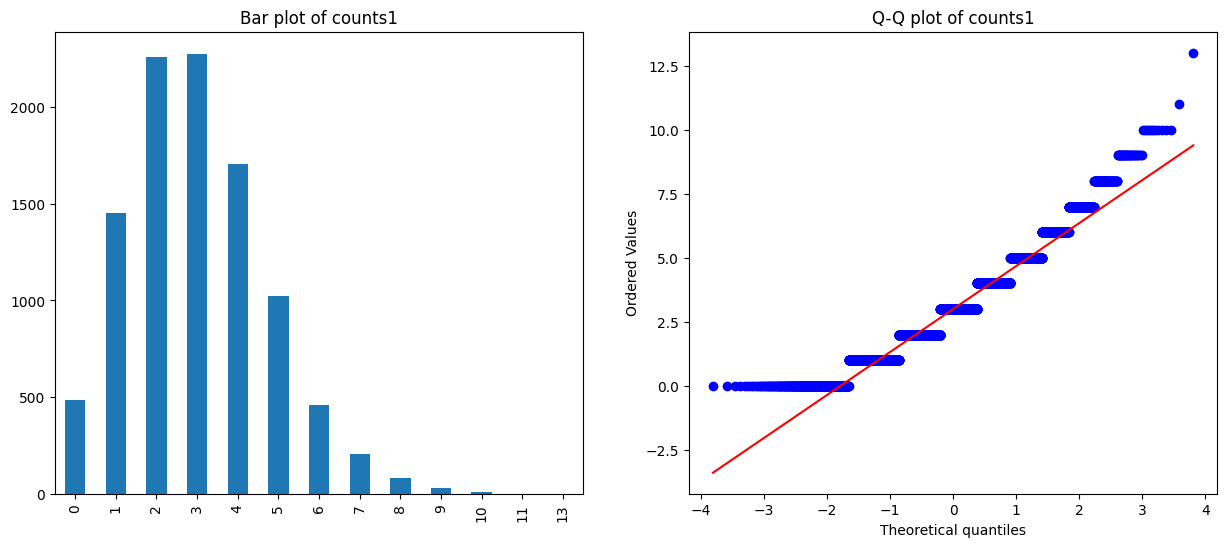

In [4]:
diagnostic_plots(df, "counts1")

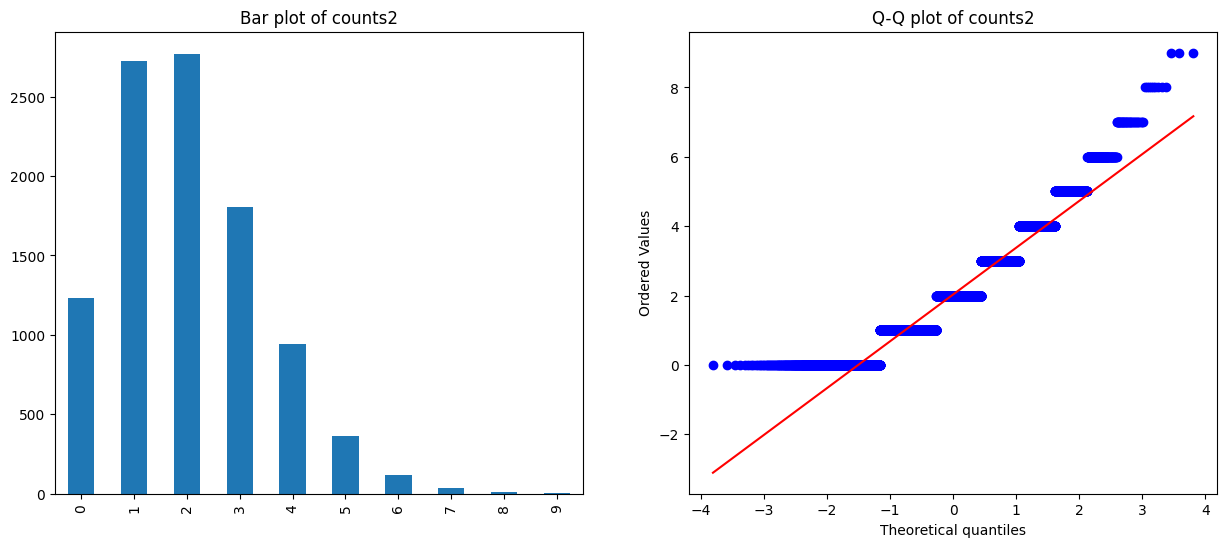

In [5]:
diagnostic_plots(df, "counts2")

# Square root with Scikit-learn

In [6]:
# make a copy of the data

df_tf = df.copy()

In [7]:
# set up transformer with desired operations

transformer = FunctionTransformer(func=lambda x: np.round(np.sqrt(x), 2))

In [8]:
# transform slice of dataframe with variables to transform

df_tf = transformer.transform(df[["counts1", "counts2"]])

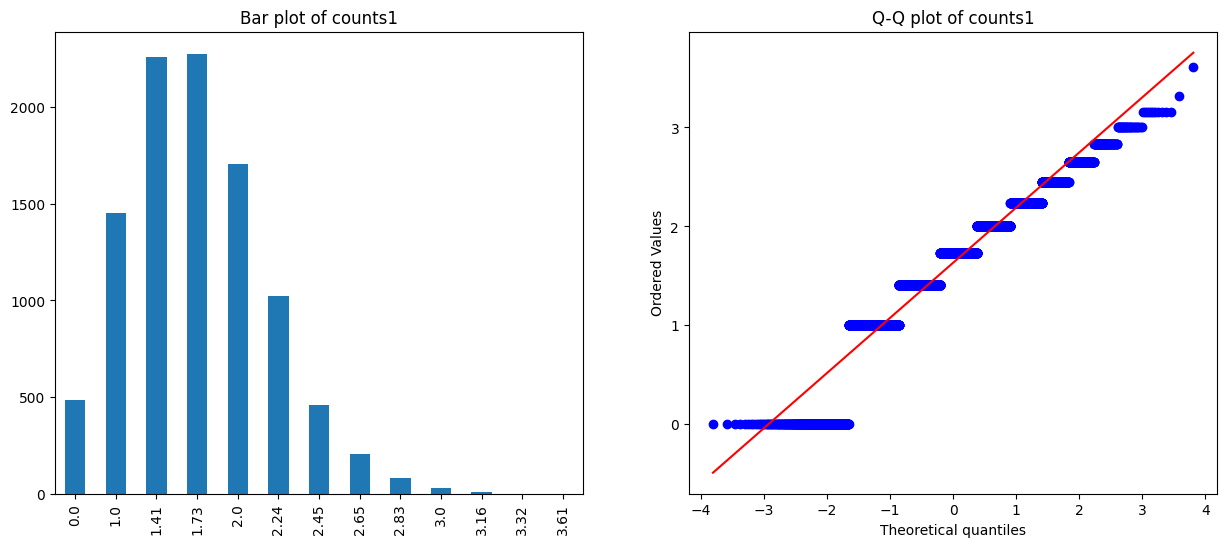

In [9]:
# check distribution of transformed variable

diagnostic_plots(df_tf, "counts1")

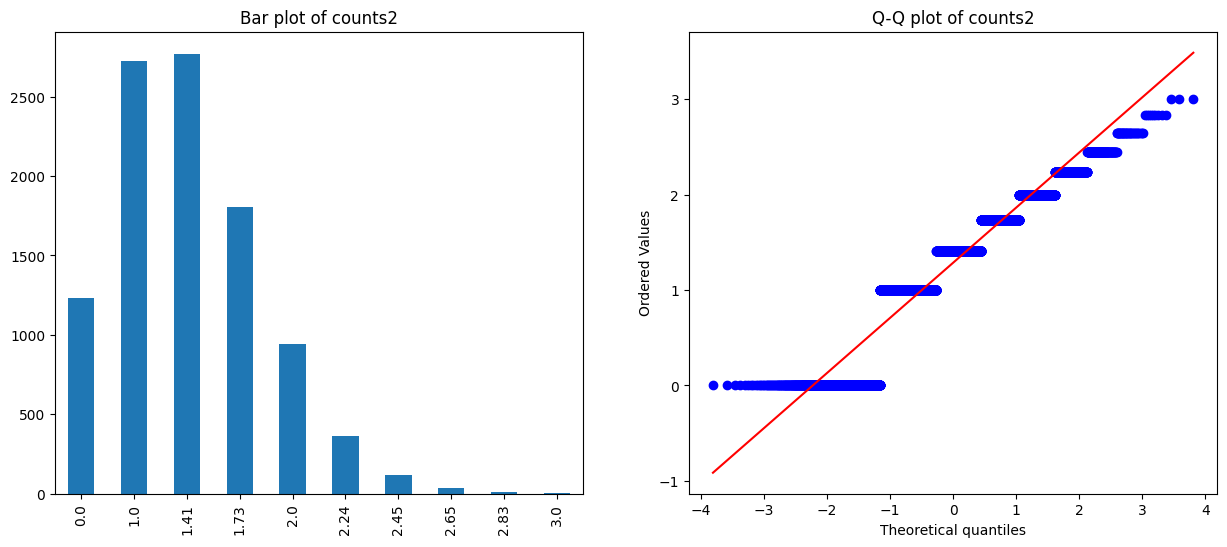

In [10]:
# check distribution of transformed variable

diagnostic_plots(df_tf, "counts2")